<a href="https://colab.research.google.com/github/Cherow/Mercy-_Cherotich-_week9_moringaschool_datasciencecore_ip/blob/main/Mercy_cherotich_week9_moringadatascincecore_KNNmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

## Week 9:KNN model

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predicting the survival rate of the victims in the titanic given various factors eg age,sex and etc

### b) Defining the Metric for Success

our metrics of success is accuracy score and it should be between 60 and 95 since below 60 is underfitting and above 95 is overfitting

### c) Understanding the context 

The Titanic was a luxury British steamship that sank in the early hours of April 15, 1912 after striking an iceberg, leading to the deaths of more than 1,500 passengers and crew out of 2240 people in the ship.There were attempts to as many people as possible but due to many drawbacks such as people being reluctant to join the lifeboat thinking they were safe in the ship yet it was sinking,the limited number of lifeboats and some lifeboats carrying less than the required number thus many people died.we are attempting to see the factors that increased the survival rate of a person in the ship during the accident


### d) Recording the Experimental Design

.import libraries

.load datasets

.data cleaning and preparation


.building KNN model 


.follow-up questins

.recommendations

.conclusion

# e) Data Relevance


We are using titanic  dataset (/content/test (1).csv) for this project. The dataset contains columns such as age,sex,passengerid,parentchildren,siblingspouse,the classes in the ship etc which are relevant to this study. The size and the number features present our dataset also makes our dataset sufficient in building models that determines whether or not a passenger survived during the accident

## 2. Reading the Data

In [483]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [484]:
# Loading the Data from the source i.e. csv
# ---
test = pd.read_csv('/content/test (1).csv')
df = pd.read_csv('/content/train (5).csv')



## 3. Checking the Data

In [485]:
# Determining the no. of records in our dataset
#
df.shape

(891, 12)

our data has 891 records and 12 columns

In [486]:
# Previewing the top of our dataset
#
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [487]:
# Previewing the bottom of our dataset
# 
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [488]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [489]:
#checking for unique values in the columns
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

our data has different type of data including float,interger and object.The object type had categorical data

## 4. Tidying the Dataset

In [490]:
# Checking for Outliers


age and fare

Text(0.5, 0.98, 'histplots ')

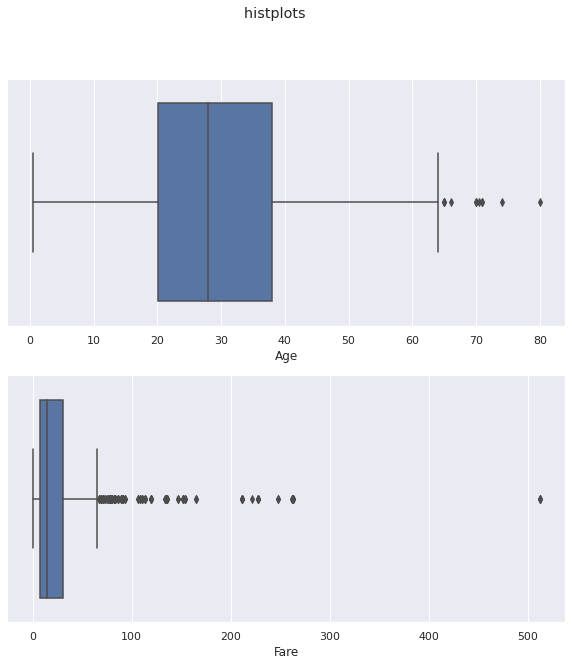

In [491]:
#checking outliers in age and fare column
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (10,10))
sns.boxplot(df['Age'],ax=ax1)
sns.boxplot(df['Fare'],ax = ax2)
plt.suptitle('histplots ')

the age has outliers and this could be because there were old people who were in the ship.the fare also had outliers because of the differences in the amounts paid by the people since the people in first class paid alot than those in other classes so we wont remove the outliers

parch and sibsp

Text(0.5, 0.98, 'histplots ')

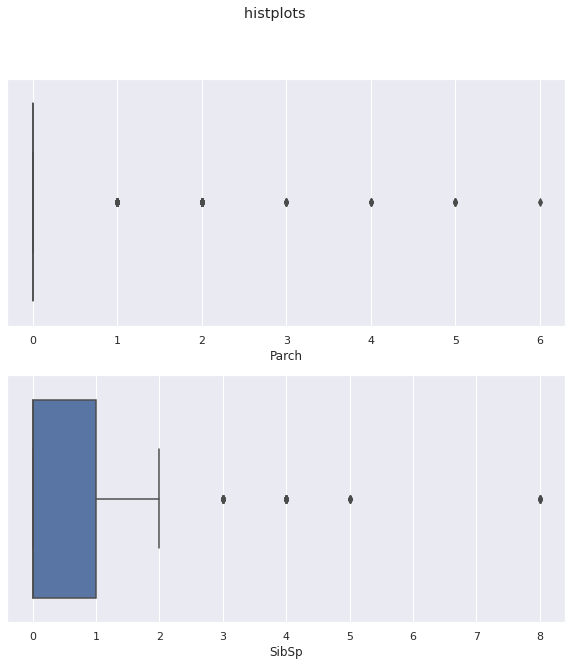

In [492]:
#checking outliers in the parch and sibsp columns
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (10,10))
sns.boxplot(df['Parch'],ax=ax1)
sns.boxplot(df['SibSp'],ax = ax2)
plt.suptitle('histplots ')

the siblings and spouses column that is sibsp had ouliers though this could be as a results of some families being large thus the outliers.the parent and children column column that is the parch had outliers and that is accounted by some families being large.

In [494]:
# Identifying the Missing Data
#
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

age,cabin and embarked columns contained missing values.
the age column had 177 missing values and we wont drop since age is an important factor in determining the survival .tha cabin has 687 missing values which is 77% of the total hence we will drop the column.embarked has only 2 so we will drop it

In [495]:
# Dealing with the Missing Data
#the missing values in the age column will be replaced by the mean of age
#we will replace the age according with the class
first_class = df[df['Pclass']==1]
first_class
#computing the mean age in the class
first_class['Age'].mean()
#filling in missing values with mean
first_class['Age'].fillna(first_class['Age'].mean(),inplace = True)
#the second class passangers
second_class = df[df['Pclass']==2]
second_class
#computing the mean age in the class
second_class['Age'].mean()
#filling in missing values with mean
second_class['Age'].fillna(second_class['Age'].mean(),inplace = True)
#third class passangers
third_class = df[df['Pclass']==3]
third_class
#computing the mean age in the class
third_class['Age'].mean()
#filling in missing values with mean
third_class['Age'].fillna(third_class['Age'].mean(),inplace = True)


In [496]:
#we concanate the data to combine the class
titanic_df = pd.concat([first_class,second_class,third_class],axis = 0)
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we divide the data into various classes and filled in the missing age with it's respective class mean since there were age difference according to classes and age was vital in determing the survival hence could not br dropped

In [497]:
#there are some columns we wont need so we drop them
#this include id,name,cabin and ticket
titanic_df.drop(['Cabin','PassengerId','Ticket','Name'],inplace=True,axis = 1)

In [498]:

#we drop the two missing value in embarked
#titanic_df.drop(['Embarked'],inplace=True,axis =1)
titanic_df.dropna(inplace=True)
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

we drop the columns since they donot influence the survival of a person 

In [499]:
#checking for duplicates
titanic_df.duplicated().sum()
#checking the duplitates in our data
duplicates = titanic_df[titanic_df.duplicated()]
duplicates
#checking the duplicates alongside unique column Names there is no need to drop since the records are same but belong 
#to different people


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
295,0,1,male,38.233441,0,0,27.7208,C
555,0,1,male,62.000000,0,0,26.5500,S
641,1,1,female,24.000000,0,0,69.3000,C
815,0,1,male,38.233441,0,0,0.0000,S
133,1,2,female,29.000000,1,0,26.0000,S
...,...,...,...,...,...,...,...,...
863,0,3,female,25.140620,8,2,69.5500,S
870,0,3,male,26.000000,0,0,7.8958,S
877,0,3,male,19.000000,0,0,7.8958,S
878,0,3,male,25.140620,0,0,7.8958,S


there no duplicates in our data

## 5. Exploratory Analysis

1.univariate analysis

In [500]:
#checking the number of female and male on the boat
titanic_df['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

the titanic ship had more male than female since water travel is majorly preferred to be suitable for men

Text(0.5, 0.98, 'count of sex')

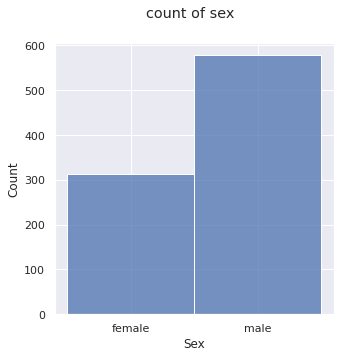

In [502]:
#we now visualise it using pie chart
sns.set(rc = {'figure.figsize':(5,5)})
sns.histplot(titanic_df['Sex'],bins = 2)
plt.suptitle('count of sex')

from our histogram we can see there were more male than female in the ship

In [424]:
#getting the number of people who survived the accident
titanic_df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

0    549
1    340
Name: Survived, dtype: int64


([<matplotlib.patches.Wedge at 0x7f7414369e90>,
 [Text(-1.0061346699846916, 0.4446268388826704, '0'),
  Text(1.0061346699846914, -0.444626838882671, '1')])

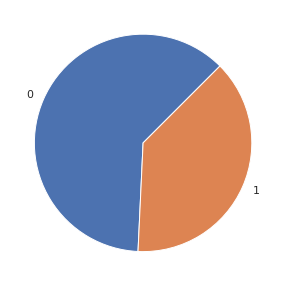

In [503]:
w= titanic_df['Survived'].value_counts()
print(w)
#visualising the count who survived and not using pie chart
labels = (0,1)
plt.pie(w,labels = labels,startangle=45)


those who did not survived were more compared to those who survived and this is becauses when the accident happened most of the passengers were  reluctant to get into the lifeboat as they thought they were safe in the ship  and the number of lifeboats were not enough to rescue many people thus many people died and from our pie chart we can see that

3    491
1    214
2    184
Name: Pclass, dtype: int64


Text(0.5, 0.98, 'counts in Pclass')

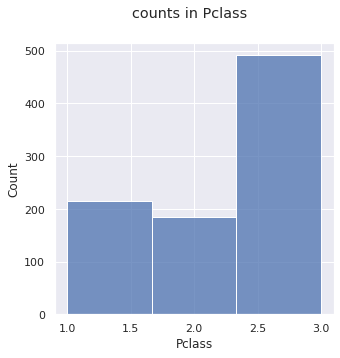

In [504]:
# checking the number of people in each class in the ship
print(titanic_df['Pclass'].value_counts())
#we visualise using histogram
sns.histplot(titanic_df['Pclass'],bins = 3)
plt.suptitle('counts in Pclass')

The ship had more people in the third class as it was cheaper than the other classes followed by first then second.the third class majorly consited of immigrants to the USA.first class had rich business people and sportmen.the second had teachers and clergy

S    644
C    168
Q     77
Name: Embarked, dtype: int64


Text(0.5, 0.98, 'count by place of embarkement')

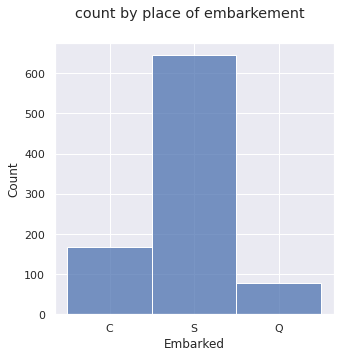

In [505]:
# finding the number of people who emarked in various place
#
print(titanic_df['Embarked'].value_counts())
#visualising using histplot
sns.histplot(titanic_df['Embarked'])
plt.suptitle('count by place of embarkement')

C = Cherbourg, Q = Queenstown, S = Southampton
many people were from S has it had special relationship with the ship followed by C and finally Q

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


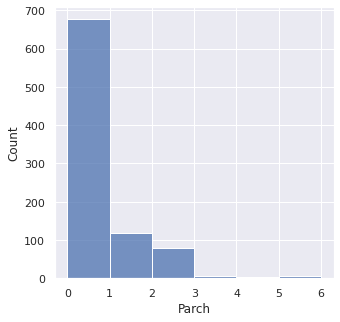

In [506]:
#finding the number of parents and children in the ship
print(titanic_df['Parch'].value_counts())
#visualising the number using histplot
sns.histplot(titanic_df['Parch'],bins=6)


the highest number of parent child was 0 and this were the children who travelled alone with nannies

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


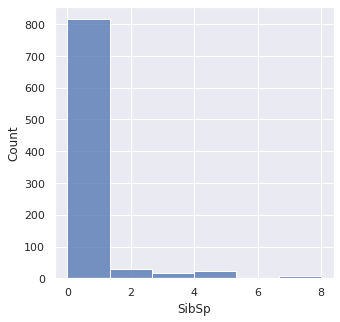

In [507]:
#finding the number of siblings and spouse in the ship
print(titanic_df['SibSp'].value_counts())
#visualising the number using histplot
sns.histplot(titanic_df['SibSp'],bins=6)

the highest number of siblings spouse is 0 and this are people who had no siblings or spouse in the ship

In [430]:
#finding the average age of passengers in each class
first = titanic_df[titanic_df['Pclass']==1]
first.describe()
#the average of people in class one is 38 and the average fare is 84
second = titanic_df[titanic_df['Pclass']==2]
second.describe()
#the average of people in class two is 29 and average fare is 20
third = titanic_df[titanic_df['Pclass']==3]
third.describe()
#the average age of people in class three is  25 and average fare is 13

,Survived,Pclass,Age,SibSp,Parch,Fare
count,491.000000,491.0,491.000000,491.000000,491.000000,491.000000
mean,0.242363,3.0,25.140620,0.615071,0.393075,13.675550
std,0.428949,0.0,10.620713,1.374883,0.888861,11.778142
min,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,0.000000,3.0,20.250000,0.000000,0.000000,7.750000
50%,0.000000,3.0,25.140620,0.000000,0.000000,8.050000
75%,0.000000,3.0,29.000000,1.000000,0.000000,15.500000
max,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


the average age in class one is 38 hence more older people were in this class and the mean fare was 84 which was expensive compared to the rest.the second class had a mean age 29 and fare was 20.the third class had a mean age of 25 and fare of 13 meaning the younger people were in this class

In [431]:
#finding kurtosis
titanic_df.kurt()

Survived    -1.769179
Pclass      -1.269437
Age          0.798427
SibSp       17.838972
Parch        9.750592
Fare        33.508477
dtype: float64

sibsp,parch and fare are leptokurtic  as they have high kurtosis
survived and pclass are platykurtic as it have low kurtosis

In [432]:
#finding skewness
titanic_df.skew()

Survived    0.484568
Pclass     -0.636998
Age         0.507710
SibSp       3.691058
Parch       2.745160
Fare        4.801440
dtype: float64

the sibsp and fare are higly skwed since they have skwenesss greater than 2

2.Bivariate Analysis

Text(0.5, 1.0, 'survival distribution with sex')

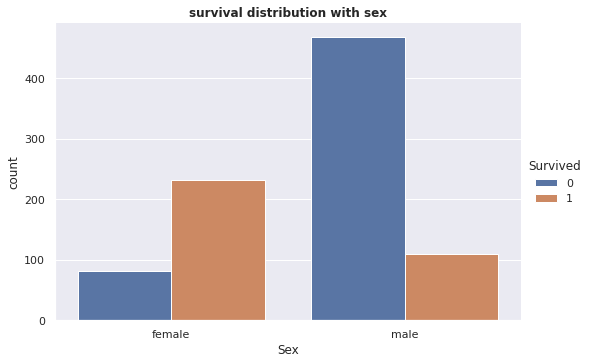

In [508]:
#comparing the survival of male and female
sns.catplot(x='Sex',hue='Survived',data=titanic_df,kind='count',aspect=1.5)
plt.title('survival distribution with sex',weight='bold')

the number of female who survived were more than the male since during the rescue female were rescued first 

Text(0.5, 1.0, 'survival distribution with class')

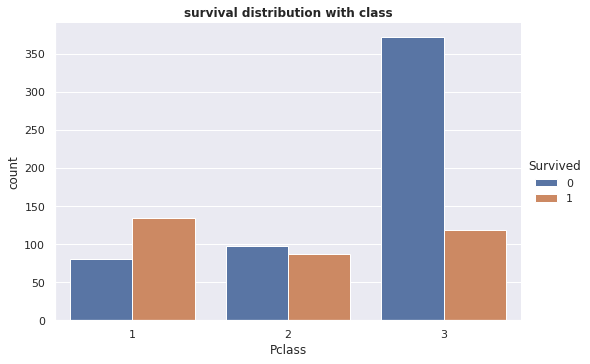

In [434]:
#comparing the survival of different classes in the  ship
sns.catplot(x='Pclass',hue='Survived',data=titanic_df,kind='count',aspect=1.5)
plt.title('survival distribution with class',weight='bold')

more people in first class survived followed by second an finally third and this because the deck for lifeboat were located in the first and second deck thus taking time for the people in the third class to reach to the life boat and be saved

Text(0.5, 1.0, 'survival distribution with place of embarked')

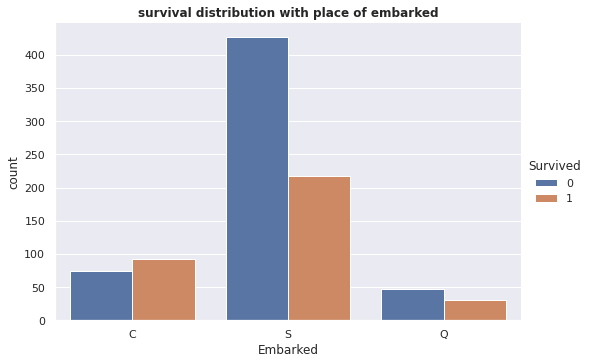

In [435]:
#comparing the classes and the place of emarkmen
sns.catplot(x='Embarked',hue='Survived',data=titanic_df,kind='count',aspect=1.5)
plt.title('survival distribution with place of embarked',weight='bold')

C = Cherbourg, Q = Queenstown, S = Southampton
s had more people who died and survived followed by Q and finally C

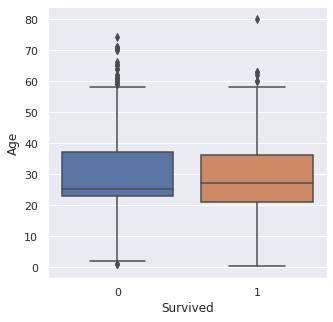

In [509]:
#comparing the age and survival
sns.boxplot(y='Age',x='Survived',data = titanic_df)

the average mean age of those whio survived ,28 was slightly higher than those who did not,25

In [438]:
#converting the categorical variables into  numeric
X= titanic_df[['Sex','Embarked']]
X_1 = pd.get_dummies(X,drop_first=False)
titanic_df.drop(['Sex','Embarked'],axis=1,inplace=True)
data = pd.concat([X_1,titanic_df],axis = 1)
data.head()


,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,0,1,0,0,1,1,38.0,1,0,71.2833
3,1,0,0,0,1,1,1,35.0,1,0,53.1000
6,0,1,0,0,1,0,1,54.0,0,0,51.8625
11,1,0,0,0,1,1,1,58.0,0,0,26.5500
23,0,1,0,0,1,1,1,28.0,0,0,35.5000


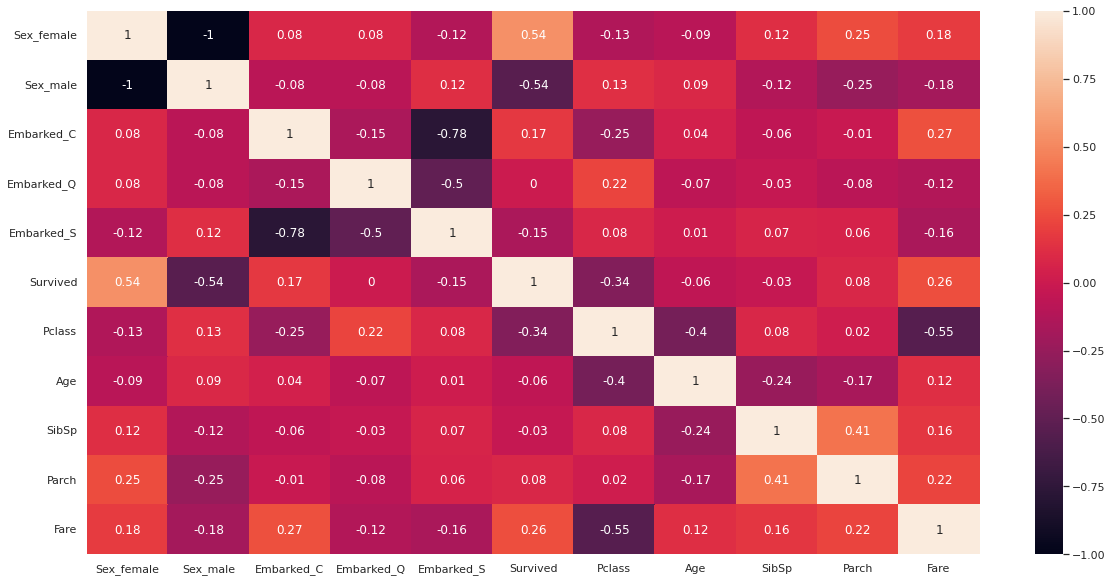

In [439]:
#finding correlation among variables
corr = round(data.corr(),2)
corr
#visualising the correlation matrix using heatmap
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(corr,annot=True)

the sex variable had the highest correlation with the survived variable of 0.54 which is moderate positive correlation.the embarked_Q has no correlation with the independent variable

## 6. Implementing the Solution

Building KNN model

a.spiliting the data into 80-20

In [463]:
# spliting data into label and features
# 
X = data.drop(['Survived'],axis = 1)
y = data['Survived']
#we split data into 20% test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [460]:
#fitting our model into the data 
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
#making prediction using the fitted model
y_pred = KNN.predict(X_test)

In [461]:
#assessing the performance of our model
print('accuracy of model :',metrics.accuracy_score(y_test,y_pred))
print('confusion_matrix of model:',metrics.confusion_matrix(y_test,y_pred))

accuracy of model : 0.702247191011236
confusion_matrix of model: [[91 23]
 [30 34]]


our model has an accuracy of 70% which is not bad and 125 out of 178 were correctly classified

b.spilliting data into 70-30

In [456]:
# spliting data into label and features
# 
X = data.drop(['Survived'],axis = 1)
y = data['Survived']
#we split data into 30% test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [457]:
#fitting our model into the data 
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
#making prediction using the fitted model
y_pred = KNN.predict(X_test)

In [458]:
#assessing the performance of our model
print('accuracy of model :',metrics.accuracy_score(y_test,y_pred))
print('confusion_matrix of model:',metrics.confusion_matrix(y_test,y_pred))

accuracy of model : 0.6853932584269663
confusion_matrix of model: [[132  33]
 [ 51  51]]


our model has accuracy of 68% which is slightly lower than the 80-20 model and 183 out of267 were correctly classified

c.spilliting into 60-40

In [450]:
# spliting data into label and features
# 
X = data.drop(['Survived'],axis = 1)
y = data['Survived']
#we split data into 40% test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [451]:
#fitting our model into the data 
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
#making prediction using the fitted model
y_pred = KNN.predict(X_test)

In [452]:
#assessing the performance of our model
print('accuracy of model :',metrics.accuracy_score(y_test,y_pred))
print('confusion_matrix of model:',metrics.confusion_matrix(y_test,y_pred))

accuracy of model : 0.6797752808988764
confusion_matrix of model: [[179  48]
 [ 66  63]]


our model has an accuracy of 67% which is the list of the 3 and 242 out of 356 were correctly classified.
to optimize our model were are using the 80-20 split since it had higher accuracy

optimizing our model

In [464]:
#scaling our data to improve it performance
scaler = StandardScaler()
scaler.fit(X_train)
X_test = scaler.transform(X_test)
X_train= scaler.transform(X_train)

In [474]:
#using gridsearch to tune the model in orderto get the best parameters
#using a 10-fold cross validation
params = {'n_neighbors':np.linspace(1,20,5,dtype=int),'weights':('uniform', 'distance'),
          'p' :np.linspace(1,10,2,dtype=int),'metric':('minkowski','manhattan', 'Euclidean')}
#searching for the best parameters for our model
search=GridSearchCV(estimator=KNN,param_grid=params,scoring='accuracy',n_jobs=1,refit=True,cv=10)

In [475]:
#obtaining the best parameters for the model
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)
#the parameters best for our model is metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'
#accuracy is 80%

{'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


0.8072574334898277

In [478]:
#fitting the model using parameters
KNN = KNeighborsClassifier(n_neighbors=5,weights='uniform',p=1,metric='minkowski')
KNN.fit(X_train,y_train)
#making prediction
y_pred = KNN.predict(X_test)

In [479]:
#assessing the performance of our model
print('accuracy of model :',metrics.accuracy_score(y_test,y_pred))
print('confusion_matrix of model:',metrics.confusion_matrix(y_test,y_pred))
#tg

accuracy of model : 0.8426966292134831
confusion_matrix of model: [[101  13]
 [ 15  49]]


after optimizing our model by scaling the features and using gridsearch to get the best parameters the model accuracy improved from 70% to 84%

## 7. Challenging the solution

after getting the accuracy using KNN we challenged the solution using hyperparameter tuning and scaling to improve performance






## 8. Follow up questions

### a). Did we have the right data?

Yes we had the right data to answer our question

### b). Do we need other data to answer our question?

No all the answers for the questions we had were in the data

a.which gender had the highest survival

b,which class had the highest survival

c.building a model for prediction

### c). Did we have the right question?

yes we had the right questions of coming up with a model that help predict survival of a person in a ship and this can be used be marine liners to know where to focus and improve in order to reduce fatalities in occurances of accidents

## 9.Conclusion and Recommendation

Conclusion

we build a model using KNN used to predict the survival in the titanic accident and it had accuracy of 70% and after some model evaluation and optimization its accuracy improved to 84%

Recommendation

we recommend that to further improve the model performance of the model there is need to check for multicollinearity and removing the highly correlated features as it may improve its accuracy.